# Clustering

Dans cet essai qui constitue le baseline des clusters pour le jeu de données, 

- Toutes les variables disponibles sont utilisées
- L'algorithme du k-means est utilisé (même si les variables ne sont pas tout à fait adéquates pour ce genre de méthode étant donné qu'elles sont binaires et ordinales plutôt que continues)

À la fin de cette étape, nous aurons : 

- Les valeurs des moyennes et ecart-type pour le scaling des variables (`03_app1_scale_origins.rds` et `03_app1_scale_ecarts_types.rds`)
- Le modèle de k-means (`03_app1_kmeans.rds`)
- Le fichier de données original augmenté des variables de cluster (`03_app1_2022.rds`)
- Un fichier csv (pour ouverture dans excel par exemple) qui contient la moyenne par cluster par variable afin de déterminer "à la main" quels sont les éléments distinctifs de chaque cluster (`03_app1_clusters_desc.csv`)

In [2]:
library(dplyr)
library(factoextra)

df_app_2025 <- readRDS(file = "../../_PrivateFolder_datagotchi_federal_2025/data/clustering/can2025/02_app_2025.rds")


Attachement du package : 'dplyr'


Les objets suivants sont masqu'es depuis 'package:stats':

    filter, lag


Les objets suivants sont masqu'es depuis 'package:base':

    intersect, setdiff, setequal, union


Le chargement a n'ecessit'e le package : ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



In [3]:
# Sélection des variables pour le clustering
source("03-0_variables.R")
df_app_2025_clust <- df_app_2025 %>% select(all_of(variables_clust)) %>% select(-id) %>%
tidyr::drop_na()

In [4]:
# Scaling des variables
df_scaled <- scale(df_app_2025_clust)

# Récupérer les moyennes et écarts-types
origines <- attr(df_scaled, "scaled:center")  # Moyennes utilisées pour centrer
ecarts_types <- attr(df_scaled, "scaled:scale")  # Écarts-types utilisés pour réduire

In [ ]:
# Détermination du nombre optimal de clusters
# Méthode de l’élbow (coude) et l’indice de silhouette.

# Méthode du coude
fviz_nbclust(df_scaled, kmeans, method = "wss", k.max = 20) +
  ggtitle("Méthode du coude")

# Indice de silhouette
fviz_nbclust(df_scaled, kmeans, method = "silhouette", k.max = 20) +
  ggtitle("Indice de silhouette")

In [5]:
# Application de K-Means Clustering

# Choisissez un nombre de clusters approprié (par exemple, 3).
k <- 10

# K-Means Clustering
set.seed(123)  # Pour la reproductibilité
kmeans_result <- kmeans(df_scaled, centers = k, nstart = 25)

In [6]:
kmeans_result

K-means clustering with 10 clusters of sizes 786, 2437, 1503, 10040, 2819, 3568, 3928, 6080, 5221, 4169

Cluster means:
     ses_urban ses_age_3Cat ses_languageFrench ses_educBHS ses_educUniv
1   0.01544643  -0.17757786        -0.34521945 -0.09703330  0.088006140
2   0.24161509   0.16580527        -1.04629715 -0.15848889  0.283582938
3  -0.47499586   0.03888906        -0.89844285  0.01555796 -0.057479639
4  -0.08618158   0.23207477         0.81773695  0.03626698 -0.081927297
5   0.09196257   0.01035153        -1.11059581 -0.02805840  0.031188515
6  -0.04111967  -0.11358912         0.02034959  0.21790374 -0.223588225
7  -0.18039944  -0.16861444         0.58806977  0.13071688 -0.203887242
8   0.04146936   0.14299113         0.56243051 -0.07988307  0.104526445
9   0.19020513  -0.58251313        -0.38188829 -0.11525132  0.194881231
10  0.07894261   0.13369281        -1.13122220 -0.01185466  0.001533525
   ses_incomeLow ses_incomeHigh ses_immigrant ses_regionAtlantic
1    0.117521555   -0.0

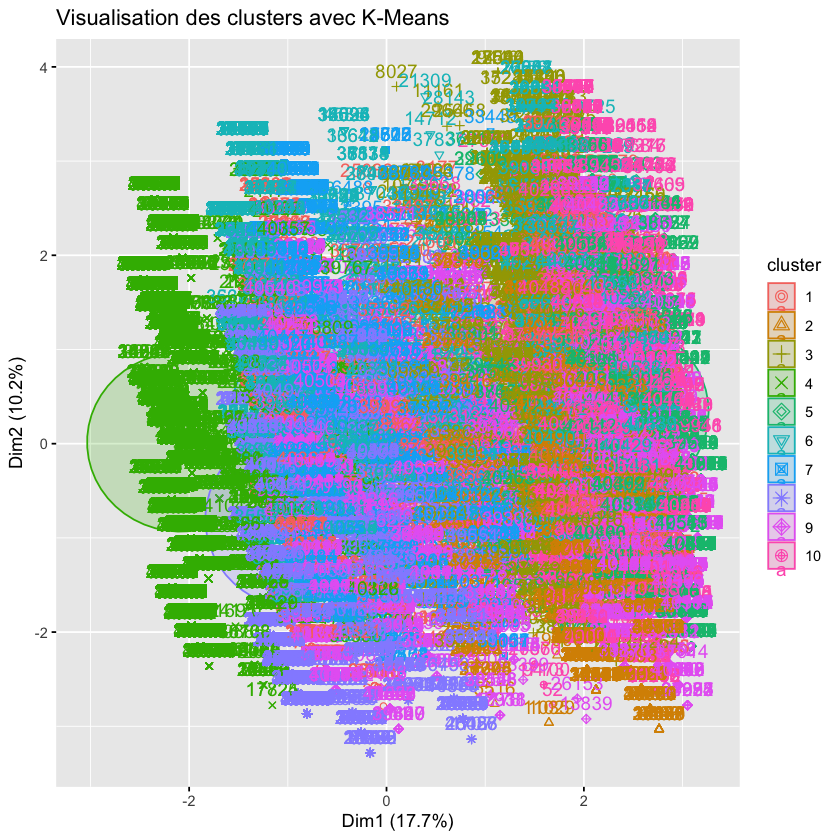

In [7]:
# Visualisation des clusters

# Visualisation des clusters dans l’espace des deux premières dimensions :

# Utilisation de factoextra pour représenter les clusters
fviz_cluster(kmeans_result, data = df_scaled, ellipse.type = "euclid") +
  ggtitle("Visualisation des clusters avec K-Means")

In [8]:
library(dplyr)
library(tidyr)

# Ajouter les clusters au dataframe original
df_app_2025$cluster <- as.factor(kmeans_result$cluster)

# Préparer les données pour pouvoir donner des noms aux clusters
df_app_2025 <- df_app_2025 %>%
  mutate(cluster_name = as.character(cluster))

# Créer des variables dummy
# Liste des clusters
clusters_uniques <- unique(df_app_2025$cluster)
# Création des variables
for (i in clusters_uniques) {
  df_app_2025[[paste0("cluster_", i)]] <- ifelse(df_app_2025$cluster == i, 1, 0)
}

ERROR: Error in `$<-.data.frame`(`*tmp*`, cluster, value = structure(c(8L, 10L, : le tableau de remplacement a 40551 lignes, le tableau remplac'e en a 43076


In [ ]:
# Sauvegarder les résultats du clustering
saveRDS(origines, file="../../_PrivateFolder_datagotchi_federal_2025/data/clustering/can2025/03_app_scale_origins.rds")
saveRDS(ecarts_types, file="../../_PrivateFolder_datagotchi_federal_2025/data/clustering/can2025/03_app_scale_ecarts_types.rds")
saveRDS(kmeans_result, file = "../../_PrivateFolder_datagotchi_federal_2025/data/clustering/can2025/03_app_kmeans.rds")
saveRDS(df_app_2025, file = "../../_PrivateFolder_datagotchi_federal_2025/data/clustering/can2025/03_app_2025.rds")